# **Data Pipeline สำหรับวิทยาการข้อมูล**

ชุดวิชาประสบการณ์วิชาชีพวิทยาการข้อมูล (99425)

13 กุมภาพันธ์ 2568

# **CRISP-DM Framework (Cross Industry Standard Process for Data Mining)**

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png">

<center>Image from : <a href="https://commons.wikimedia.org/wiki/File:CRISP-DM_Process_Diagram.png">Kenneth Jensen</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons</center>


1. **Business Understanding**:
   - ระบุปัญหาและวัตถุประสงค์ของโครงการ
   - แปลงคำถามเชิงธุรกิจให้เป็นคำถามที่เกี่ยวข้องกับข้อมูล
2. **Data Understanding**:
   - ทำความเข้าใจข้อมูลที่มีอยู่
   - ใช้การวิเคราะห์เชิงสำรวจ (EDA) เพื่อหา Insight
3. **Data Preparation**:
   - ทำความสะอาดข้อมูล เช่น เติม Missing Values และจัดการ Outliers
   - สร้าง Features ใหม่ เช่น การแปลงข้อความเป็น Features
4. **Modeling**:
   - เลือกโมเดลที่เหมาะสม เช่น Logistic Regression, Decision Tree, หรือ Random Forest
5. **Evaluation**:
   - ประเมินความแม่นยำของโมเดลด้วย Metrics เช่น Accuracy, Precision, Recall
6. **Deployment**:
   - นำโมเดลไปใช้งานในสถานการณ์จริง


# **Alzheimer's Prediction**

- **PyCaret Installation**

In [ ]:
!pip install -q git+https://github.com/pycaret/pycaret.git@master pycaret[mlops]

  Preparing metadata (setup.py) ... done


- Restart session and test

In [ ]:
import matplotlib
matplotlib.__version__

'3.7.5'

In [ ]:
import pycaret
pycaret.__version__ #ตรวจสอบเวอร์ชั่น

'3.4.0'

## **Business Understanding**

- โรคอัลไซเมอร์เป็นปัญหาที่เพิ่มขึ้นทั่วโลก ส่งผลกระทบต่อชีวิตของผู้คนหลายล้านคน ทั้งที่เป็นผู้ป่วยเองและครอบครัวที่ได้รับผลกระทบ

- การเข้าใจถึงปัจจัยที่ทำให้เกิดโรคนี้จะช่วยในการวินิจฉัยเบื้องต้นและชะลอการดำเนินของโรคได้

- การพยาการณ์การเกิดโรคได้อาจช่วยให้การวางแผนการรับมือทำได้ดีขึ้นและลดผลกระทบที่อาจเกิดขึ้นได้

## **Data Understanding**

**Datasets**
- https://raw.githubusercontent.com/iamkaew/ds_pipeline/refs/heads/main/alzheimers_dataset.csv
- ดัดแปลงจาก [Alzheimer’s Prediction Dataset (Global)](https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global)
- ประกอบด้วย 74,283 รายการจาก 20 ประเทศ
- ให้ข้อมูลเชิงลึกเกี่ยวกับปัจจัยเสี่ยงของโรคอัลไซเมอร์
    - ด้านประชากร
    - ไลฟ์สไตล์
    - การแพทย์
    - พันธุกรรม
- มีการกระจายที่สะท้อนความแตกต่างในโลกแห่งความเป็นจริงของแต่ละภูมิภาค

### **1. Load Data**

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/iamkaew/ds_pipeline/refs/heads/main/alzheimers_dataset.csv"
df = pd.read_csv(url)

# โหลดไฟล์ CSV
df = pd.read_csv("https://raw.githubusercontent.com/iamkaew/ds_pipeline/refs/heads/main/alzheimers_dataset.csv")  # แทน "data.csv" ด้วย path ไฟล์ของคุณ

# แสดงข้อมูล 5 แถวแรก
print(df.head())

        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy                   High      

### **2. View Metadata**

- `DataFrame.info()`

In [ ]:
df.info() #BMI,Diabetes,stress level have data error

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74282 entries, 0 to 74281
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74282 non-null  object 
 1   Age                                   74282 non-null  int64  
 2   Gender                                74282 non-null  object 
 3   Education Level                       74282 non-null  int64  
 4   BMI                                   74203 non-null  float64
 5   Physical Activity Level               74282 non-null  object 
 6   Smoking Status                        74282 non-null  object 
 7   Alcohol Consumption                   74282 non-null  object 
 8   Diabetes                              74277 non-null  object 
 9   Hypertension                          74282 non-null  object 
 10  Cholesterol Level                     74282 non-null  object 
 11  Family History 

- ตรวจค่าว่าง
- `DataFrame.isna()`

In [ ]:
df.isna().sum()

,0
Country,0
Age,0
Gender,0
Education Level,0
BMI,79
Physical Activity Level,0
Smoking Status,0
Alcohol Consumption,0
Diabetes,5
Hypertension,0


- ตรวจรายการซ้ำ
- `DataFrame.duplicated()`

In [ ]:
df.duplicated().sum()

0

### **3. EDA การวิเคราะห์ข้อมูลเชิงสำรวจ**

- ดูข้อมูลทางสถิติ
- `DataFrame.describe()`

In [ ]:
df.describe(include='object').T #ใช้สำหรับ สรุปสถิติของข้อมูลประเภท Object (String, Categorical) และ Transpose (สลับแถว-คอลัมน์) ให้ดูง่ายขึ้น

,count,unique,top,freq
Country,74282,20,Brazil,3839
Gender,74282,2,Female,37248
Physical Activity Level,74282,3,High,24853
Smoking Status,74282,3,Current,24915
Alcohol Consumption,74282,3,Never,24864
Diabetes,74277,2,No,59521
Hypertension,74282,2,No,52134
Cholesterol Level,74282,2,Normal,51972
Family History of Alzheimer’s,74282,2,No,52004
Depression Level,74282,3,Medium,24843


- แยกประเภทคอลัมน์
- `DataFrame.select_dtypes('number')`
- `DataFrame.select_dtypes('object')`

In [ ]:
numeric_columns = df.select_dtypes('number')
categorical_columns = df.select_dtypes('object')

numeric_columns


,Age,Education Level,BMI,Cognitive Test Score
0,90,1,33.0,90
1,72,7,29.9,65
2,86,19,22.9,43
3,53,17,31.2,81
4,58,3,30.0,49
...,...,...,...,...
74277,60,3,22.6,42
74278,58,18,30.6,42
74279,57,13,28.2,61
74280,73,7,29.0,97


- ดูการกระจายของข้อมูล
- `Series.value_counts()`
- `Series.unique()`
- `Series.nunique()`

In [ ]:
df['Country'].unique()
df['Country'].value_counts()

,count
Country,
Brazil,3839
Germany,3807
Australia,3787
Russia,3778
South Africa,3760
Japan,3751
India,3741
South Korea,3731
Argentina,3731


In [ ]:
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")
    print(df[col].value_counts(),'\n')

Country: ['Spain' 'Argentina' 'South Africa' 'China' 'Sweden' 'South Korea'
 'Germany' 'UK' 'Canada' 'India' 'Italy' 'USA' 'Russia' 'Japan'
 'Australia' 'France' 'Norway' 'Saudi Arabia' 'Mexico' 'Brazil']
Country
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3731
Argentina       3731
Italy           3724
Canada          3711
France          3710
Norway          3706
Spain           3698
Sweden          3689
Saudi Arabia    3662
UK              3651
USA             3616
Mexico          3598
China           3592
Name: count, dtype: int64 

Gender: ['Male' 'Female']
Gender
Female    37248
Male      37034
Name: count, dtype: int64 

Physical Activity Level: ['Medium' 'High' 'Low']
Physical Activity Level
High      24853
Low       24753
Medium    24676
Name: count, dtype: int64 

Smoking Status: ['Never' 'Former' 'Current']
Smoking Status
Current    24915
Never      24740
For

- วาดกราฟ

In [ ]:
import matplotlib.pyplot as plt #ดูความสัมพันธ์ของคอลัมน์
import seaborn as sns

- `Seaborn.countplot()`

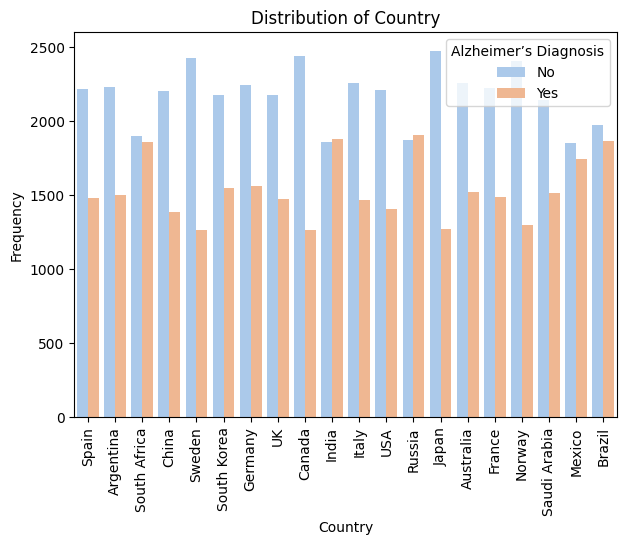

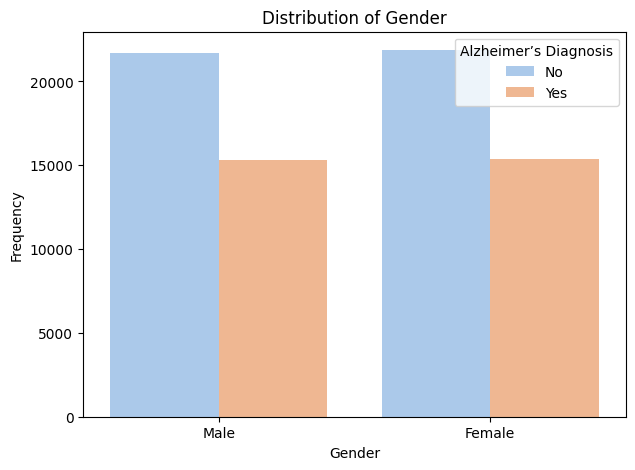

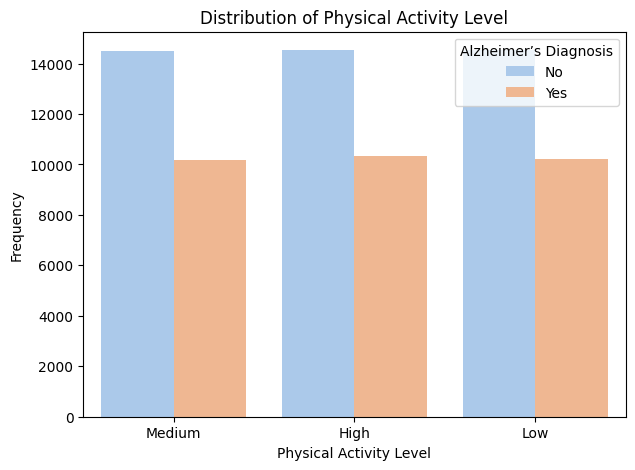

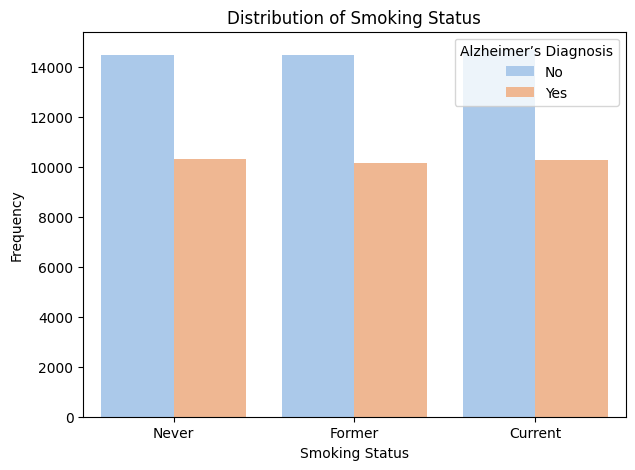

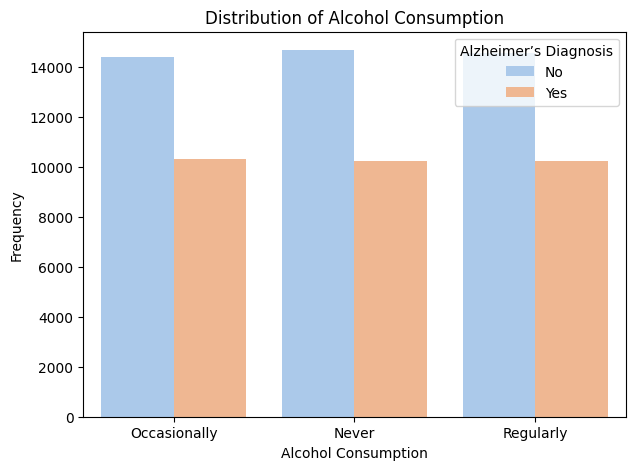

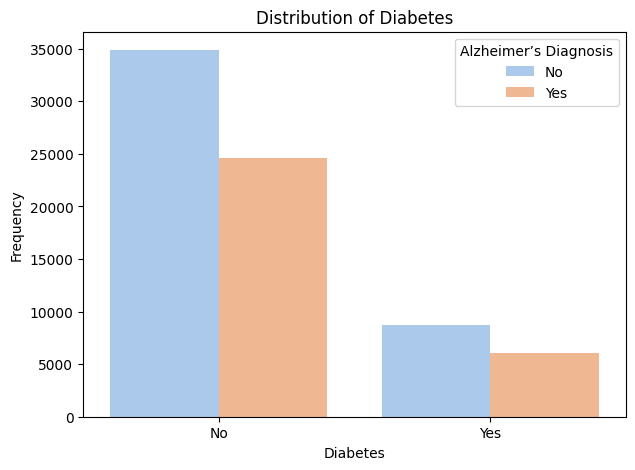

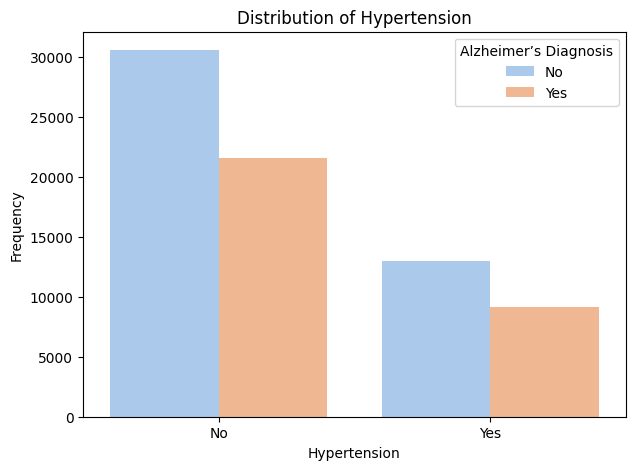

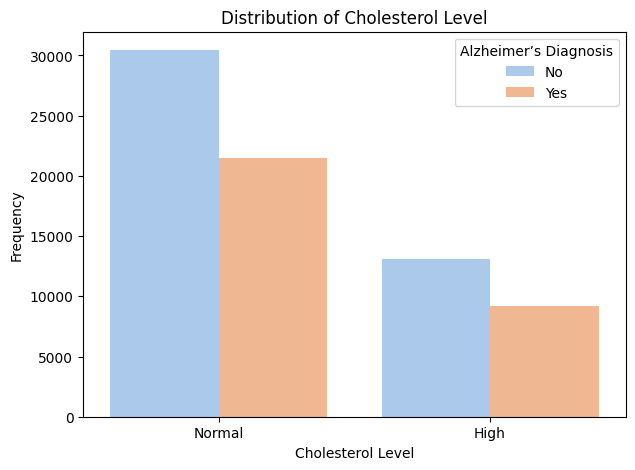

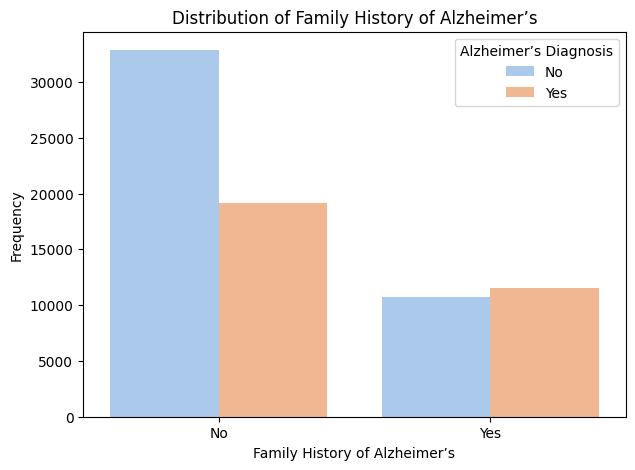

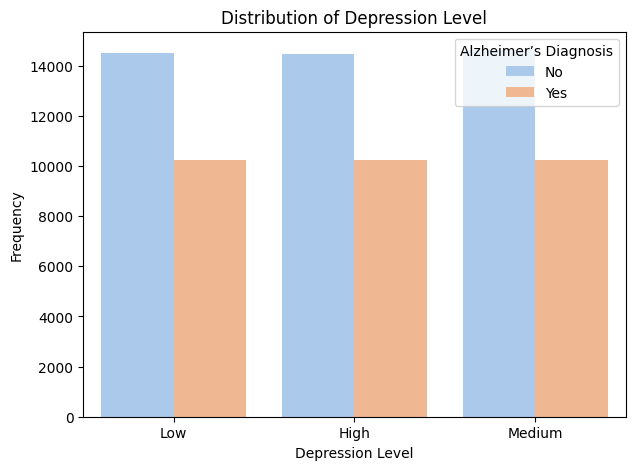

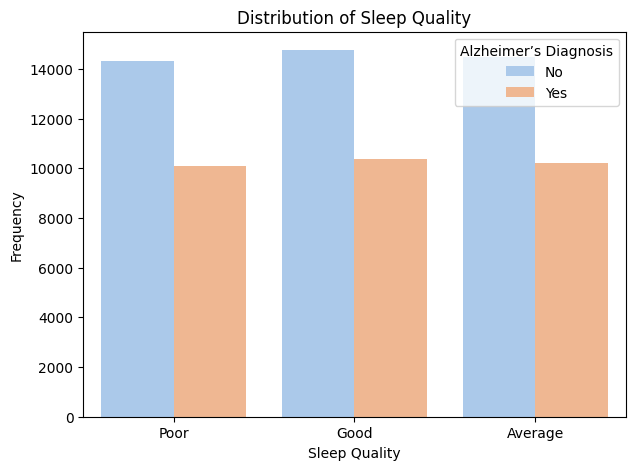

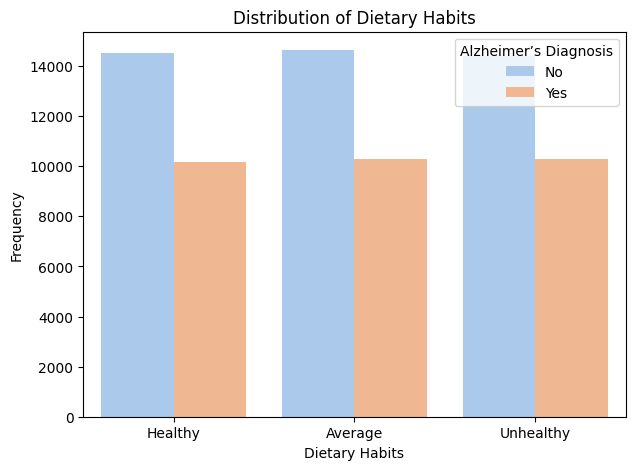

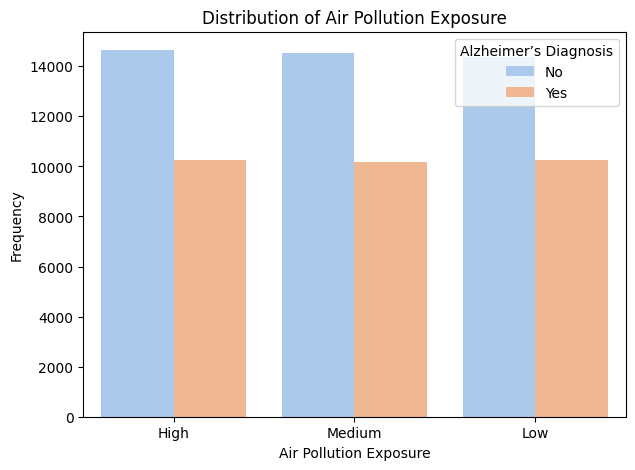

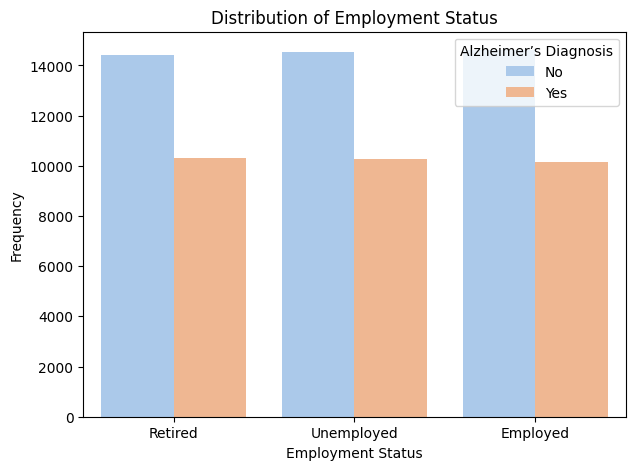

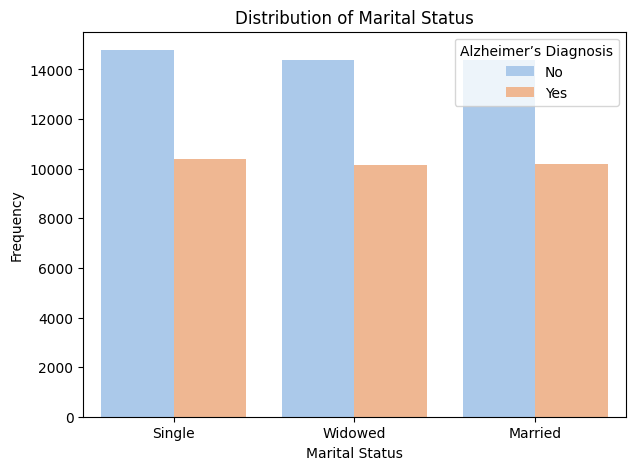

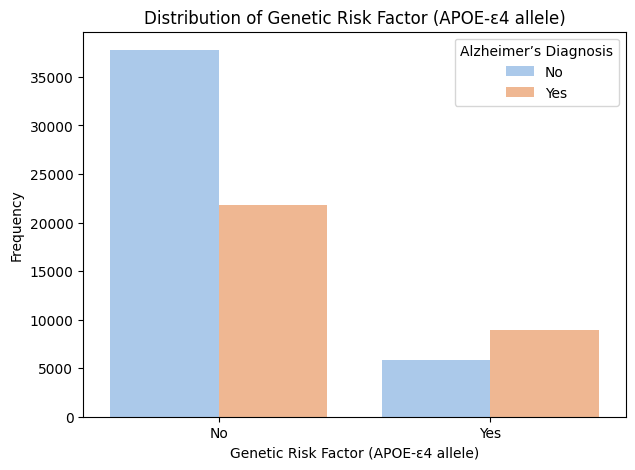

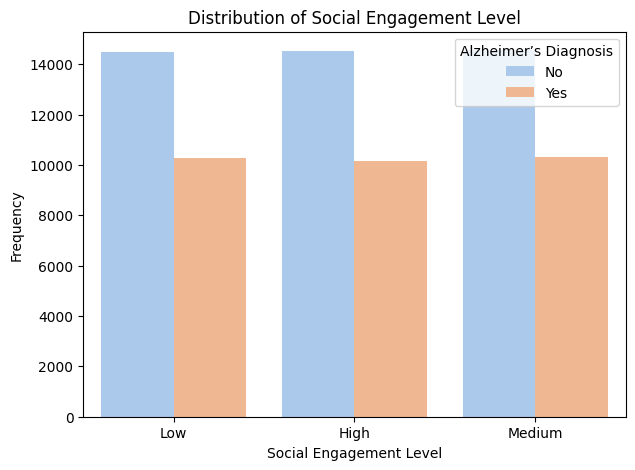

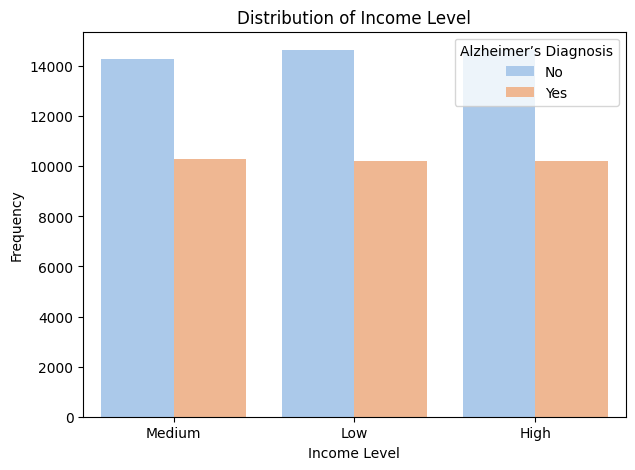

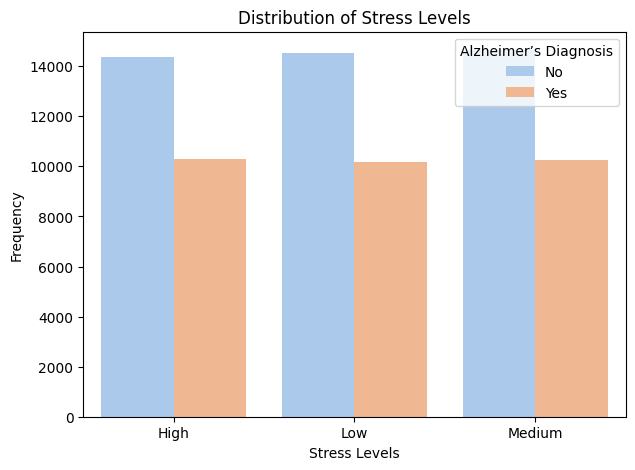

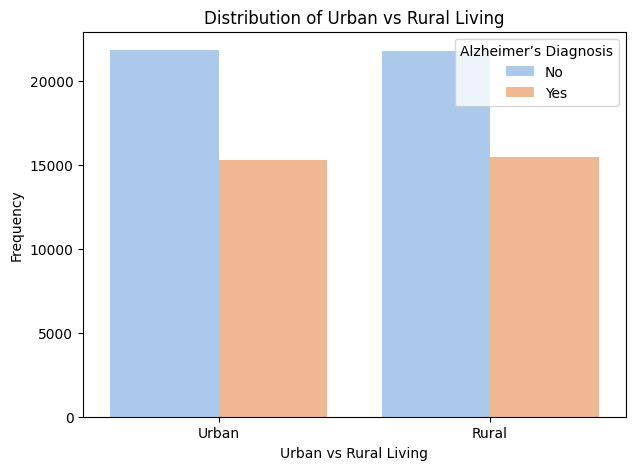

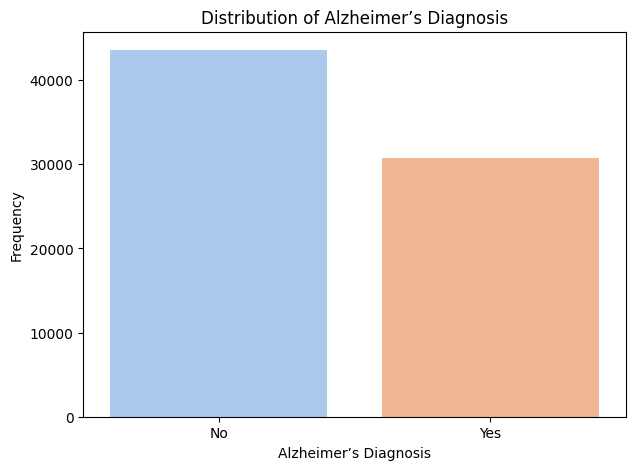

In [ ]:
for col in  categorical_columns:
  plt.figure(figsize=(7,5))
  sns.countplot(data=df,x=col,hue='Alzheimer’s Diagnosis',palette='pastel')
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  if col == 'Country':
    plt.xticks(rotation=90) #เปลี่ยนชือประเทศเป็นแบบหมุน 90 องศา
  plt.show()

https://seaborn.pydata.org/_images/color_palettes_22_0.svg

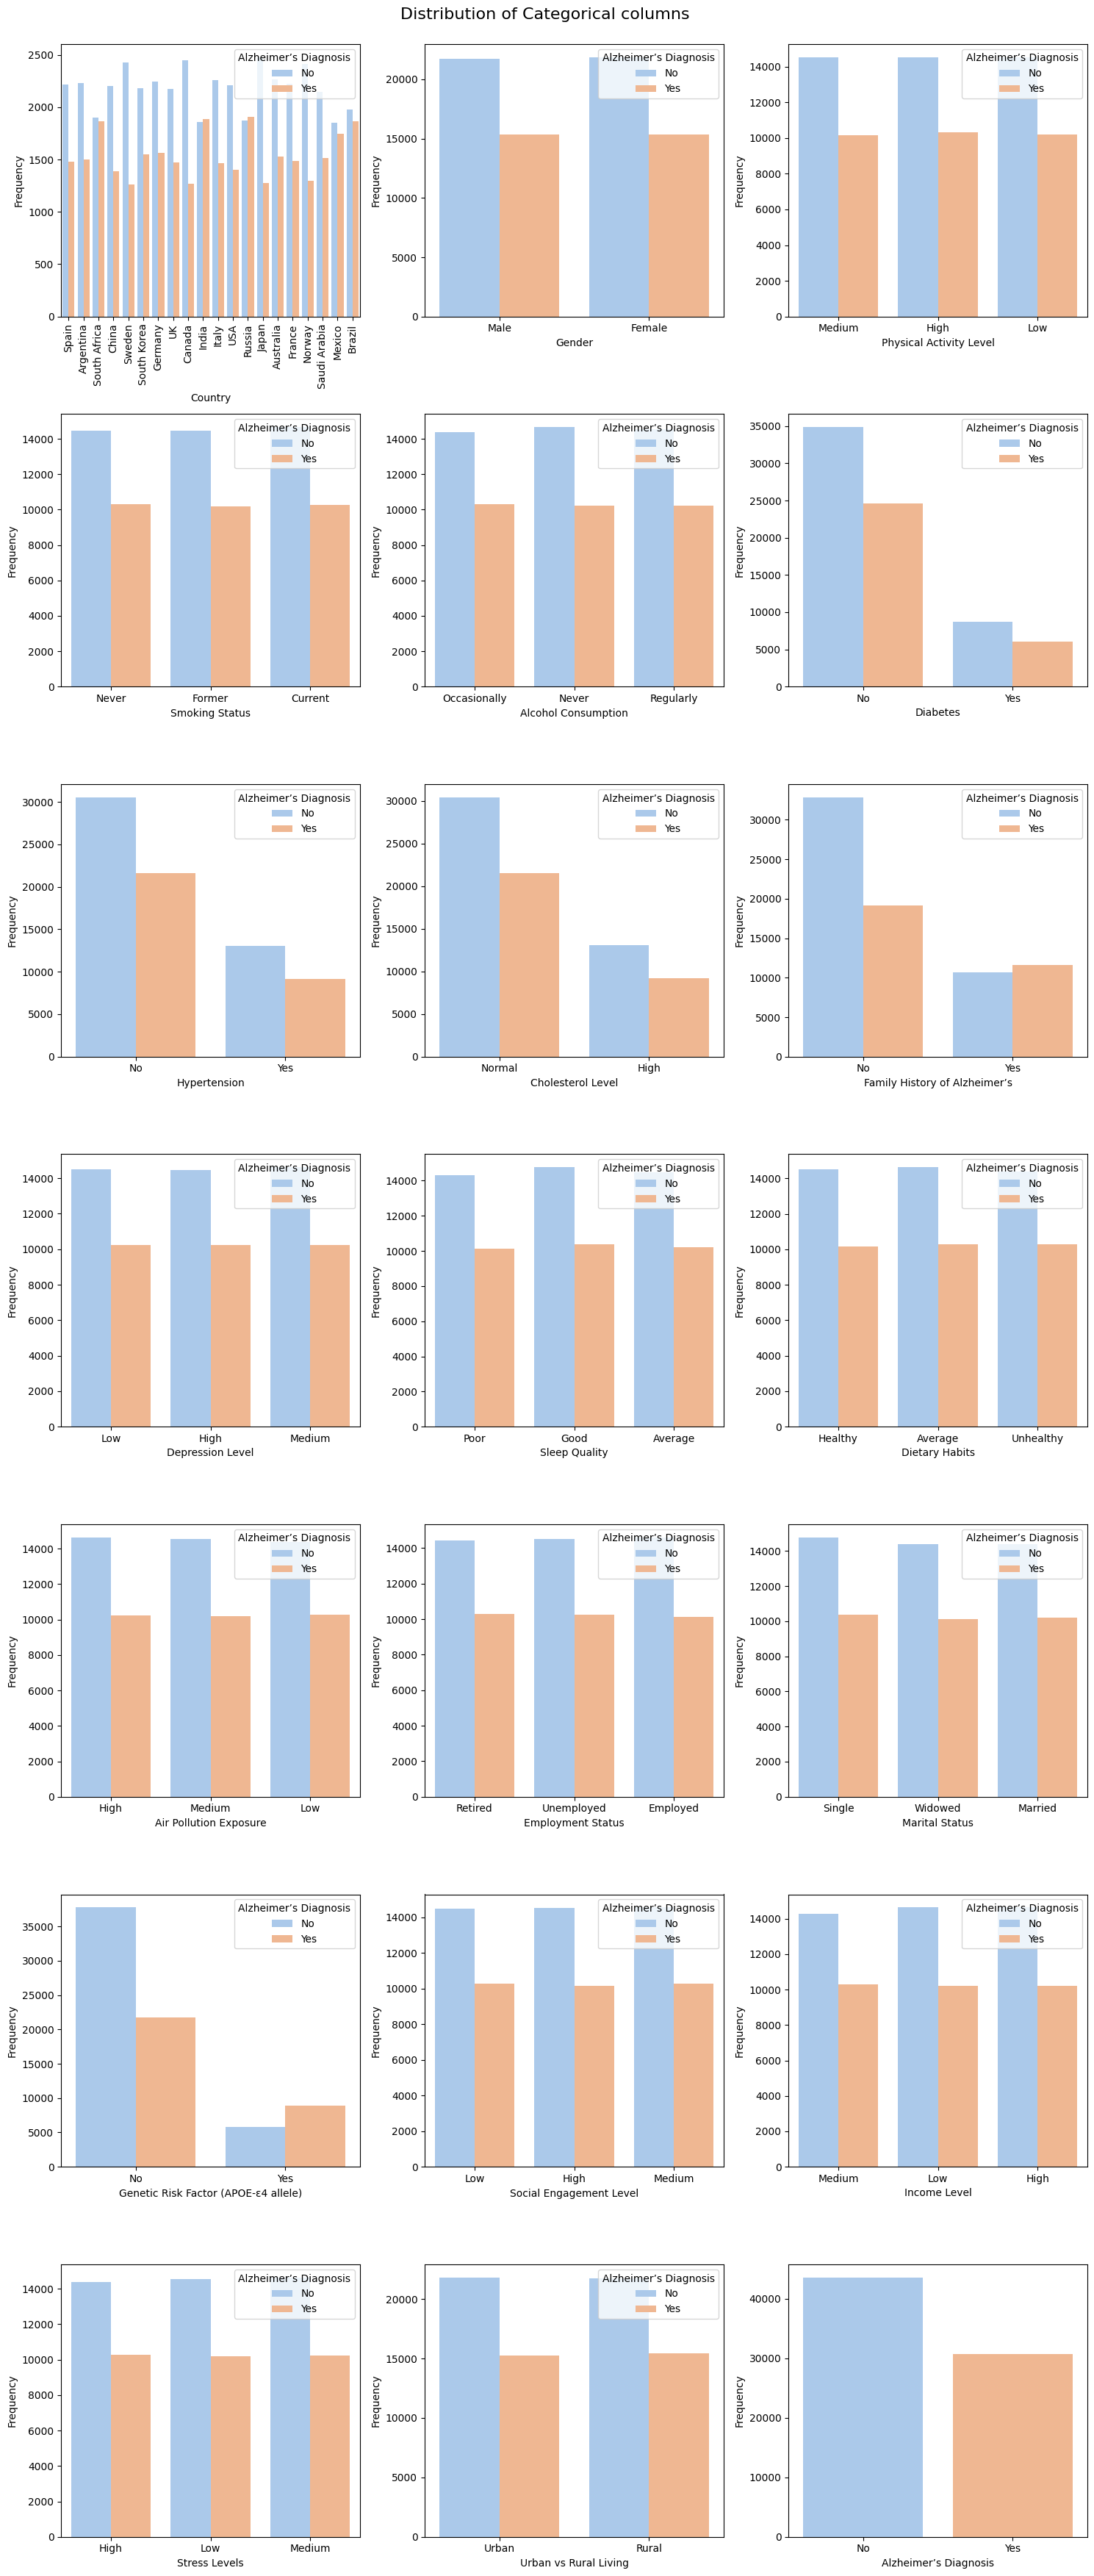

In [ ]:
fig = plt.figure(figsize=(15,35))
for i,col in enumerate(categorical_columns):
  plt.subplot(7,3,i+1 )
  sns.countplot(data=df,x=col,hue='Alzheimer’s Diagnosis',palette='pastel')
  plt.ylabel('Frequency')
  if col == 'Country':
    plt.xticks(rotation=90)
fig.suptitle("Distribution of Categorical columns ",fontsize=16,y=1) #
plt.tight_layout()
plt.show()

- Histogram
- `Seaborn.histplot()`

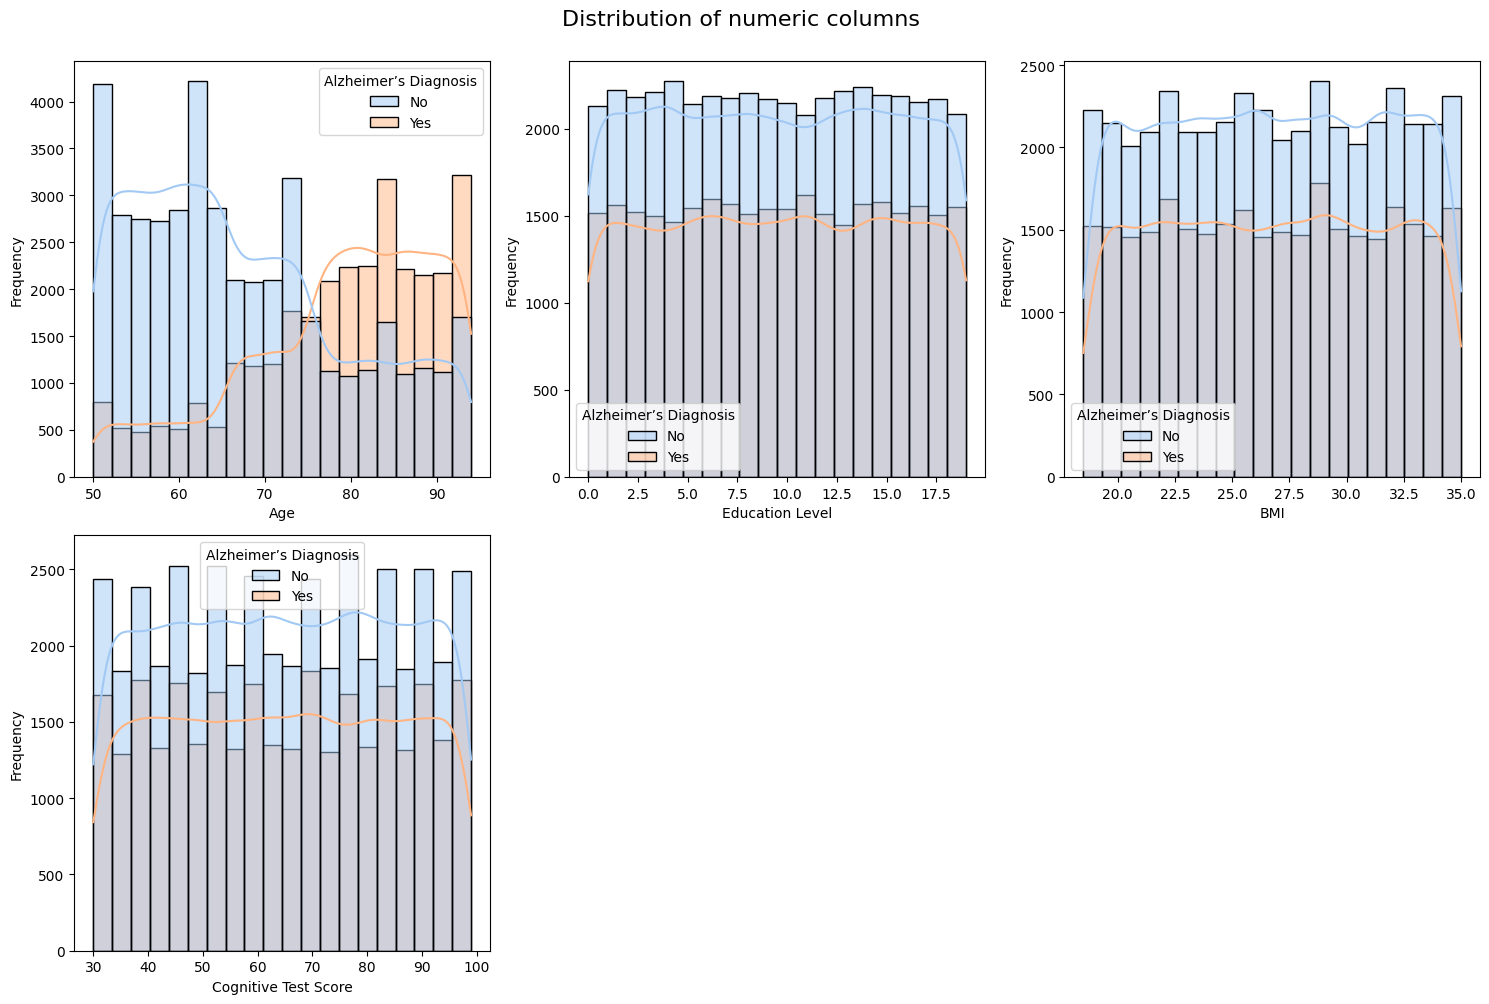

In [ ]:
fig = plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_columns):
  plt.subplot(2,3,i+1 )
  sns.histplot(data=df,x=col,bins=20,kde=True,hue='Alzheimer’s Diagnosis',palette='pastel') #bins แบ่งจำนวนแท่งกราฟ
  plt.ylabel('Frequency')
  #if col == 'Country':
  # plt.xticks(rotation=90)
fig.suptitle("Distribution of numeric columns ",fontsize=16,y=1) #
plt.tight_layout()
plt.show()

- Boxplot แสดง percentile ในข้อมูลต่อเนื่อง
- `Seaborn.boxplot()`

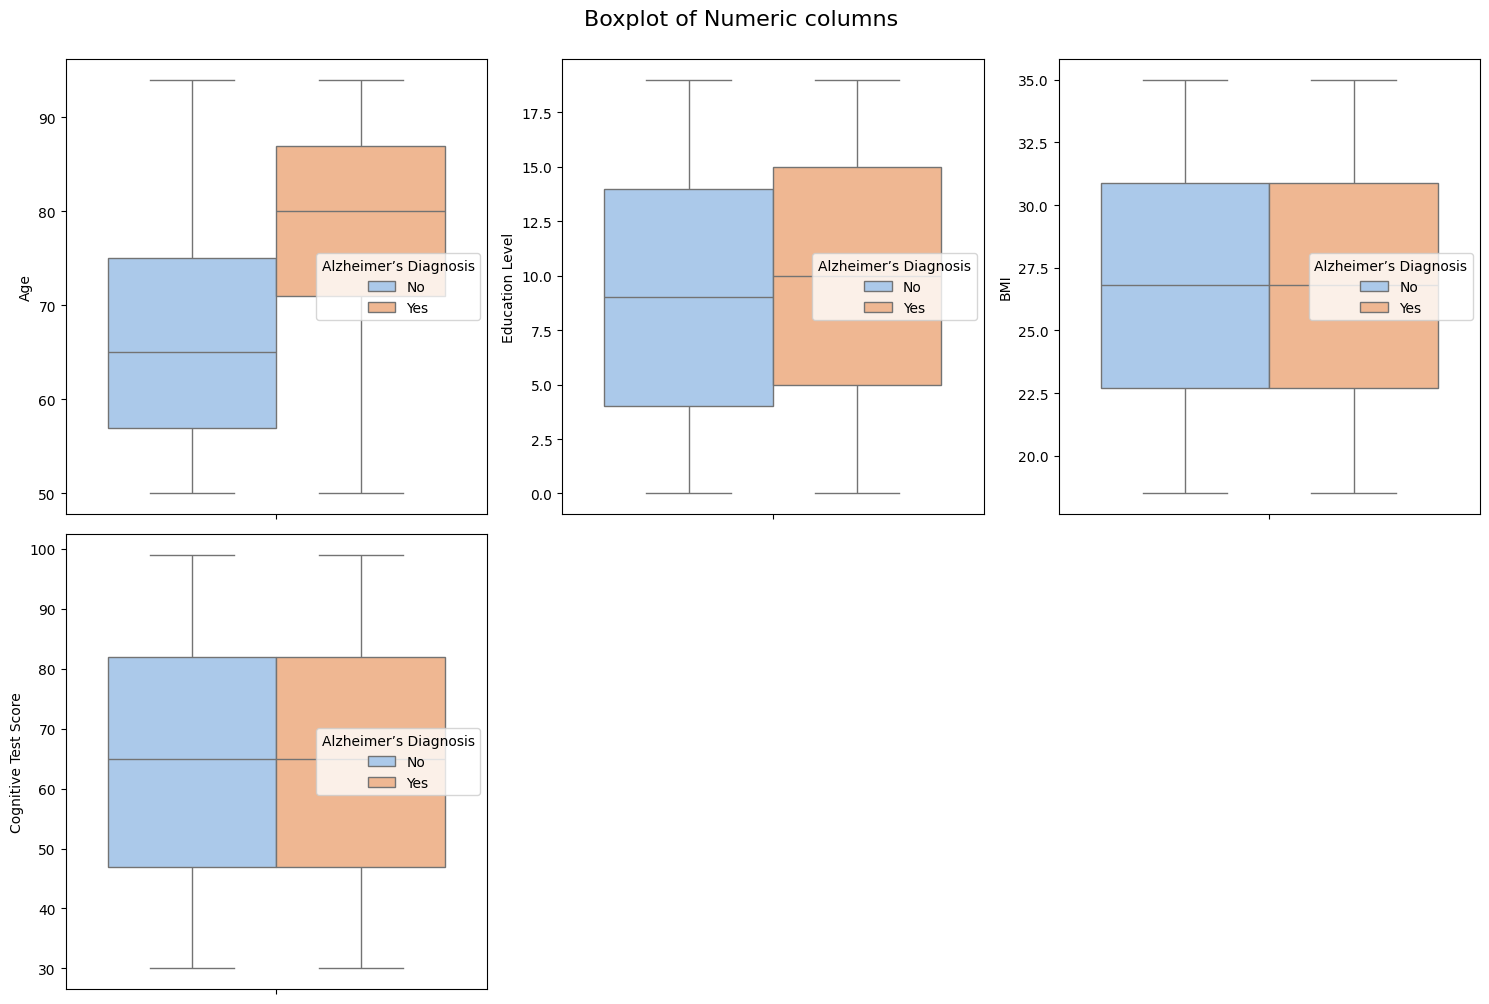

In [ ]:
fig = plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_columns):
  plt.subplot(2,3,i+1 )
  sns.boxplot(data=df,y=col,hue='Alzheimer’s Diagnosis',palette='pastel')
  #plt.ylabel('Frequency')
  #if col == 'Country':
  #  plt.xticks(rotation=90)
fig.suptitle("Boxplot of Numeric columns ",fontsize=16,y=1) #
plt.tight_layout()
plt.show()

- Pairplot ความสัมพันธ์ระหว่างคอลัมน์
- `Seaborn.pairplot()`

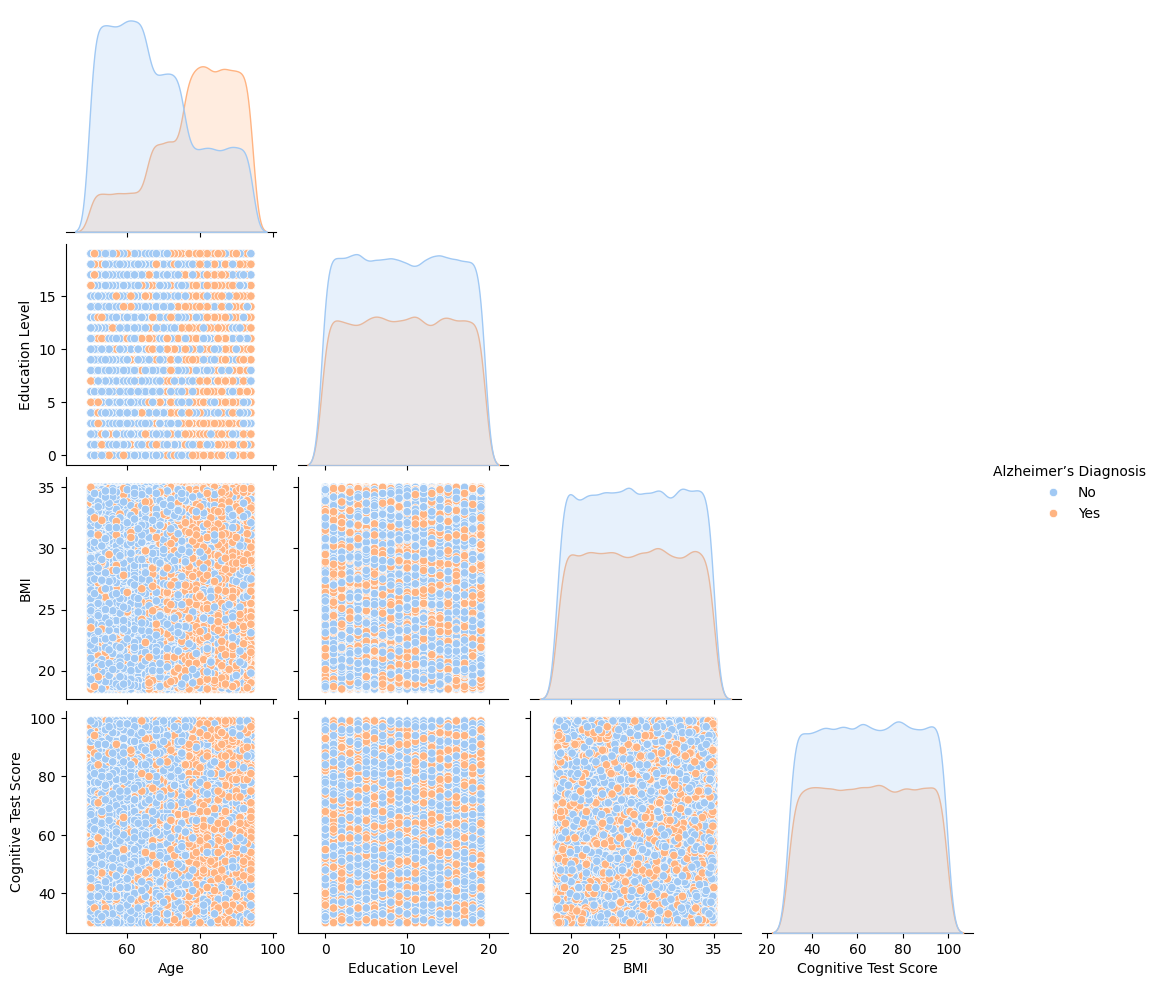

In [ ]:
sns.pairplot(df,corner=True,hue='Alzheimer’s Diagnosis',palette='pastel') #corner ใช้เรียกกราฟที่ไมซ้ำกันเหลือแค่สามเหลี่ยมล่าง
plt.show()

- Correlation ใช้ได้กับค่าข้อมูลที่เป็นตัวเลข
- `DataFrame.corr()`
- `Seaborn.heatmap()`

In [ ]:
numeric_columns.corr()


,Age,Education Level,BMI,Cognitive Test Score
Age,1.000000,0.006505,-0.000130,0.000062
Education Level,0.006505,1.000000,0.005455,-0.002501
BMI,-0.000130,0.005455,1.000000,0.005528
Cognitive Test Score,0.000062,-0.002501,0.005528,1.000000


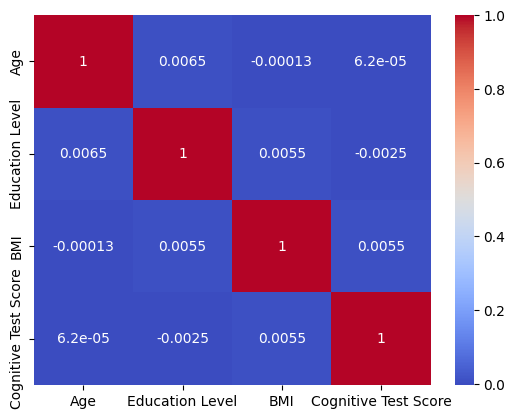

In [ ]:
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm')
plt.show()

https://matplotlib.org/stable/users/explain/colors/colormaps.html

## **Data Preparation**

- Datatype
- Missing values
- Outliers
- Feature engineering
- ...

In [ ]:
prep_df = df.copy()

### **5. Imputation**

- Numeric imputation
- `BMI` fill by **mean**

In [ ]:
prep_df['BMI']= prep_df['BMI'].fillna(prep_df['BMI'].mean())
prep_df['BMI'].isna().sum()

0

- Category imputation
- `Diabetes` fill by **mode**

In [ ]:
prep_df['Diabetes'].mode()

,Diabetes
0,No


In [ ]:
prep_df['Diabetes']= prep_df['Diabetes'].fillna(prep_df['Diabetes'].mode()[0]) #ค่าที่เป็น object ส่วนใหญ่จะใช้ค่า mode ฐานนิยมมาใข้
prep_df['Diabetes'].isna().sum()

0

In [ ]:
prep_df['Stress Levels'] = prep_df['Stress Levels'].fillna(prep_df['Stress Levels'].mode()[0])
prep_df['Stress Levels'].isna().sum()

0

In [ ]:
prep_df.isna().sum()

,0
Country,0
Age,0
Gender,0
Education Level,0
BMI,0
Physical Activity Level,0
Smoking Status,0
Alcohol Consumption,0
Diabetes,0
Hypertension,0


### **6. Feature Engineering**

- Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns.drop('Alzheimer’s Diagnosis',axis=1):
  label_encoders[col] = LabelEncoder()
  prep_df[col] = label_encoders[col].fit_transform(prep_df[col])


In [ ]:
prep_df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,16,90,1,1,33.0,2,2,1,0,0,...,1,0,1,1,0,1,2,0,1,No
1,0,72,1,7,29.9,2,1,0,0,0,...,1,2,2,2,0,0,1,0,1,No
2,14,86,0,19,22.9,0,0,1,0,1,...,0,2,0,1,0,1,2,2,0,No
3,4,53,1,17,31.2,1,2,2,1,0,...,1,2,1,1,0,0,2,1,0,No
4,17,58,0,3,30.0,0,1,0,1,0,...,2,0,0,0,0,1,2,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74277,12,60,0,3,22.6,0,1,0,0,0,...,0,0,2,2,0,2,0,2,0,No
74278,18,58,1,18,30.6,1,2,1,1,0,...,0,2,2,1,0,2,0,0,0,No
74279,16,57,0,13,28.2,2,2,2,0,0,...,1,1,0,1,1,0,1,2,0,No
74280,2,73,0,7,29.0,1,2,2,0,0,...,1,1,0,2,0,1,1,0,0,No


- สร้าง feature ใหม่
- Health_Risk_Index = BMI + Cholesterol Level + Hypertension

In [ ]:
label_encoders


{'Country': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Physical Activity Level': LabelEncoder(),
 'Smoking Status': LabelEncoder(),
 'Alcohol Consumption': LabelEncoder(),
 'Diabetes': LabelEncoder(),
 'Hypertension': LabelEncoder(),
 'Cholesterol Level': LabelEncoder(),
 'Family History of Alzheimer’s': LabelEncoder(),
 'Depression Level': LabelEncoder(),
 'Sleep Quality': LabelEncoder(),
 'Dietary Habits': LabelEncoder(),
 'Air Pollution Exposure': LabelEncoder(),
 'Employment Status': LabelEncoder(),
 'Marital Status': LabelEncoder(),
 'Genetic Risk Factor (APOE-ε4 allele)': LabelEncoder(),
 'Social Engagement Level': LabelEncoder(),
 'Income Level': LabelEncoder(),
 'Stress Levels': LabelEncoder(),
 'Urban vs Rural Living': LabelEncoder()}

In [ ]:
pd.to_pickle(label_encoders,'label_encoders.pkl')

In [ ]:
prep_df['Health_Risk_Index'] = prep_df['BMI'] + prep_df['Cholesterol Level'] + prep_df['Hypertension']
prep_df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis,Health_Risk_Index
0,16,90,1,1,33.0,2,2,1,0,0,...,0,1,1,0,1,2,0,1,No,34.0
1,0,72,1,7,29.9,2,1,0,0,0,...,2,2,2,0,0,1,0,1,No,30.9
2,14,86,0,19,22.9,0,0,1,0,1,...,2,0,1,0,1,2,2,0,No,24.9
3,4,53,1,17,31.2,1,2,2,1,0,...,2,1,1,0,0,2,1,0,No,32.2
4,17,58,0,3,30.0,0,1,0,1,0,...,0,0,0,0,1,2,0,0,No,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74277,12,60,0,3,22.6,0,1,0,0,0,...,0,2,2,0,2,0,2,0,No,22.6
74278,18,58,1,18,30.6,1,2,1,1,0,...,2,2,1,0,2,0,0,0,No,31.6
74279,16,57,0,13,28.2,2,2,2,0,0,...,1,0,1,1,0,1,2,0,No,28.2
74280,2,73,0,7,29.0,1,2,2,0,0,...,1,0,2,0,1,1,0,0,No,29.0


## **Modeling**

**PyCaret** is an open-source, low-code machine learning library in Python that automates machine learning workflows.
- [Official URL](https://pycaret.org/)
- [Documents](https://pycaret.readthedocs.io/en/latest/index.html)
- [GitHub](https://github.com/pycaret/pycaret/tree/master)


### **7. Setup**

In [ ]:
from pycaret.classification import *

- `setup()`

In [ ]:
setup(prep_df, session_id=425, target='Alzheimer’s Diagnosis', train_size=0.8, fold=5 )

,Description,Value
0,Session id,425
1,Target,Alzheimer’s Diagnosis
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(74282, 26)"
5,Transformed data shape,"(74282, 26)"
6,Transformed train set shape,"(59425, 26)"
7,Transformed test set shape,"(14857, 26)"
8,Numeric features,25
9,Preprocess,True


- ดูผลการเตรียมข้อมูล
- `get_config()`

In [ ]:
get_config('X_train')

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Health_Risk_Index
2167,5,69,0,13,22.799999,1,0,1,0,0,...,0,2,1,1,0,2,2,1,1,23.799999
69012,0,60,1,15,33.200001,0,0,1,0,0,...,1,1,0,1,0,1,0,2,1,33.200001
22220,8,91,1,7,25.500000,1,1,0,0,0,...,2,2,1,0,1,2,1,2,1,26.500000
11359,11,79,0,9,33.400002,0,1,0,0,1,...,0,0,1,0,1,1,2,2,1,35.400002
44432,5,57,0,12,28.400000,1,0,0,1,0,...,2,0,0,2,0,1,0,0,0,29.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27743,16,52,0,12,28.299999,0,0,0,0,1,...,2,0,2,2,0,1,0,1,1,30.299999
2802,8,61,0,11,22.400000,2,1,1,0,0,...,1,2,1,0,0,2,0,2,1,23.400000
49648,15,81,0,12,19.799999,2,2,1,1,0,...,1,2,2,2,0,1,0,0,0,20.799999
7299,13,78,1,17,23.700001,1,2,1,0,0,...,0,1,1,0,1,0,1,0,0,24.700001


In [ ]:
get_config('X_train_transformed')

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Health_Risk_Index
2167,5.0,69.0,0.0,13.0,22.799999,1.0,0.0,1.0,0.0,0.0,...,0.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,23.799999
69012,0.0,60.0,1.0,15.0,33.200001,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,33.200001
22220,8.0,91.0,1.0,7.0,25.500000,1.0,1.0,0.0,0.0,0.0,...,2.0,2.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,26.500000
11359,11.0,79.0,0.0,9.0,33.400002,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,35.400002
44432,5.0,57.0,0.0,12.0,28.400000,1.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,29.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27743,16.0,52.0,0.0,12.0,28.299999,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,30.299999
2802,8.0,61.0,0.0,11.0,22.400000,2.0,1.0,1.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0,23.400000
49648,15.0,81.0,0.0,12.0,19.799999,2.0,2.0,1.0,1.0,0.0,...,1.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,20.799999
7299,13.0,78.0,1.0,17.0,23.700001,1.0,2.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,24.700001


### **8. Select model**

- `compare_model()`

In [ ]:
best_model = compare_models() #select model best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7269,0.8031,0.7269,0.7345,0.7286,0.4473,0.4499,2.2920
gbc,Gradient Boosting Classifier,0.7269,0.8040,0.7269,0.7306,0.7281,0.4429,0.4438,8.5840
lightgbm,Light Gradient Boosting Machine,0.7267,0.8020,0.7267,0.7288,0.7275,0.4402,0.4405,2.6900
rf,Random Forest Classifier,0.7192,0.7906,0.7192,0.7185,0.7188,0.4195,0.4195,9.9980
xgboost,Extreme Gradient Boosting,0.7151,0.0000,0.7151,0.7143,0.7146,0.4108,0.4108,1.8780
lr,Logistic Regression,0.7107,0.7845,0.7107,0.7078,0.7081,0.3949,0.3963,3.4940
ridge,Ridge Classifier,0.7107,0.7846,0.7107,0.7081,0.7085,0.3959,0.3970,0.4360
lda,Linear Discriminant Analysis,0.7107,0.7846,0.7107,0.7081,0.7085,0.3961,0.3971,0.4840
et,Extra Trees Classifier,0.7045,0.7801,0.7045,0.7012,0.7010,0.3797,0.3818,9.4340
nb,Naive Bayes,0.6992,0.7765,0.6992,0.6963,0.6968,0.3717,0.3728,0.5300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

[AdaBoostClassifier(algorithm='deprecated', estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=425),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=425, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0

- ทดสอบกับ Testing data
- `predict_model()`

In [ ]:
predict_model(best_model[0], data=get_config('X_test'))

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Health_Risk_Index,prediction_label,prediction_score
46316,6,55,1,14,24.100000,2,1,0,0,1,...,2,2,0,2,0,0,0,26.100000,No,0.7640
47463,18,92,0,0,33.000000,2,1,1,0,0,...,1,0,0,2,1,2,0,34.000000,Yes,0.5044
13060,15,67,0,4,25.100000,2,0,2,0,0,...,1,1,0,1,1,0,1,26.100000,No,0.6272
57415,0,50,1,12,34.400002,2,0,0,0,1,...,0,2,1,2,1,1,1,35.400002,No,0.6341
39572,11,65,0,0,32.900002,0,0,0,0,0,...,2,2,0,0,1,1,1,32.900002,No,0.6717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29289,2,63,1,5,28.299999,0,2,0,0,0,...,2,2,0,0,0,2,1,28.299999,No,0.6490
47403,16,58,0,6,31.000000,1,1,1,0,0,...,2,1,0,2,2,2,0,31.000000,No,0.7673
18358,10,70,1,13,32.400002,1,2,0,0,0,...,0,2,0,0,1,0,1,33.400002,No,0.6263
57933,5,56,0,3,21.000000,2,1,2,0,1,...,0,1,1,0,1,0,0,22.000000,No,0.6334


In [ ]:
predict_model(best_model[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7228,0.7991,0.7228,0.7289,0.7244,0.4375,0.4392


,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Health_Risk_Index,Alzheimer’s Diagnosis,prediction_label,prediction_score
46316,6,55,1,14,24.100000,2,1,0,0,1,...,2,0,2,0,0,0,26.100000,No,No,0.7640
47463,18,92,0,0,33.000000,2,1,1,0,0,...,0,0,2,1,2,0,34.000000,Yes,Yes,0.5044
13060,15,67,0,4,25.100000,2,0,2,0,0,...,1,0,1,1,0,1,26.100000,No,No,0.6272
57415,0,50,1,12,34.400002,2,0,0,0,1,...,2,1,2,1,1,1,35.400002,Yes,No,0.6341
39572,11,65,0,0,32.900002,0,0,0,0,0,...,2,0,0,1,1,1,32.900002,No,No,0.6717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29289,2,63,1,5,28.299999,0,2,0,0,0,...,2,0,0,0,2,1,28.299999,No,No,0.6490
47403,16,58,0,6,31.000000,1,1,1,0,0,...,1,0,2,2,2,0,31.000000,No,No,0.7673
18358,10,70,1,13,32.400002,1,2,0,0,0,...,2,0,0,1,0,1,33.400002,No,No,0.6263
57933,5,56,0,3,21.000000,2,1,2,0,1,...,1,1,0,1,0,0,22.000000,No,No,0.6334


## **Evaluation**

### **9. Evaluate model**

- `evaluate_model()`

In [ ]:
evaluate_model(best_model[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

- classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(get_config('y_test'), predict_model(best_model[0])['prediction_label']))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7228,0.7991,0.7228,0.7289,0.7244,0.4375,0.4392


              precision    recall  f1-score   support

          No       0.79      0.73      0.75      8714
         Yes       0.65      0.72      0.68      6143

    accuracy                           0.72     14857
   macro avg       0.72      0.72      0.72     14857
weighted avg       0.73      0.72      0.72     14857



## **Deployment**

- **API**
- Application

### **10. Finalize model**

- `finalize_model()`

In [ ]:
final_model = finalize_model(best_model)

### **11. Save model**

- `save_model()`

In [ ]:
save_model(final_model,'final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Country', 'Age', 'Gender',
                                              'Education Level', 'BMI',
                                              'Physical Activity Level',
                                              'Smoking Status',
                                              'Alcohol Consumption', 'Diabetes',
                                              'Hypertension',
                                              'Chol...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                          

### **12. Create API**

In [ ]:
!pip install -q nest-asyncio pyngrok

- ลงทะเบียนรับ Authentication token
- [ngrok](https://dashboard.ngrok.com/get-started/setup/linux)

In [ ]:
!ngrok config add-authtoken 2syhwm7ZgyW40rpzYnXVQAQvVIu_2SSKcT7Yzajpbxd4XEARg

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


- Load model
- `load_model()`

In [ ]:
from pycaret.classification import *

final_model = load_model('final_model')


Transformation Pipeline and Model Successfully Loaded


- สร้าง API
- `create_api()`

In [ ]:
create_api(final_model, 'AP_api') #AP_api  สร้างไฟล์

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python AP_api.py


**edit AP_api.py line 16,17**
```python
input_model = create_model("AP_api_input", **{'Country': (float, 5.0), 'Age': (float, 69.0), 'Gender': (float, 0.0), 'Education Level': (float, 13.0), 'BMI': (float, 22.799999237060547), 'Physical Activity Level': (float, 1.0), 'Smoking Status': (float, 0.0), 'Alcohol Consumption': (float, 1.0), 'Diabetes': (float, 0.0), 'Hypertension': (float, 0.0), 'Cholesterol Level': (float, 1.0), 'Family History of Alzheimer’s': (float, 0.0), 'Cognitive Test Score': (float, 61.0), 'Depression Level': (float, 2.0), 'Sleep Quality': (float, 1.0), 'Dietary Habits': (float, 0.0), 'Air Pollution Exposure': (float, 2.0), 'Employment Status': (float, 1.0), 'Marital Status': (float, 1.0), 'Genetic Risk Factor (APOE-ε4 allele)': (float, 0.0), 'Social Engagement Level': (float, 2.0), 'Income Level': (float, 2.0), 'Stress Levels': (float, 1.0), 'Urban vs Rural Living': (float, 1.0), 'Health_Risk_Index': (float, 23.799999237060547)})
output_model = create_model("AP_api_output", prediction=(int, 0))
```

- Run API server

In [ ]:
import nest_asyncio #เปิดช่อง api
from pyngrok import ngrok

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()

Public URL: https://fe0a-34-34-93-177.ngrok-free.app


In [ ]:
!python AP_api.py

Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [88419]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     202.28.101.124:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     202.28.101.124:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     202.28.101.124:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     202.28.101.124:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     202.28.101.124:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     202.28.101.124:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Finished server process [88419]
ERROR:    Traceback (most recent call last):
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "uvloop/loop.pyx", line 1512, in uvloop.loop.Loop.run_until_complete
  File "uvloop/loop.pyx", line 1505, in uvloop.loop.Loop.run_until_complete
  File "uvloop/loop.pyx", line 1379, in uvloop.loop.Loop.run_forever
  File "uvloop/loop.pyx", line 557, in uvloop.loop.Loop._run
  File "uvloop/loop.pyx", line 476, in uvloop.loop.Loop._on_idle
  File "uvloop/cbhandles.pyx", line 83, in uvloop.loop.Handle._run
  File "uvloop/cbhandles.pyx", line 63, in uvloop.loop.Handle._run
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 69, in serve
    with self.capture_signals():
  File 

- Browser
```address
[Public URL]/docs
```

### **13. Create Application (Streamlit)**

- Install [Streamlit](https://streamlit.io/)

In [ ]:
!pip install -q streamlit

- สร้าง Streamlit application


In [ ]:
%%writefile AP_app.py
import streamlit as st
import pandas as pd
from pycaret.classification import *

df = pd.read_csv("https://raw.githubusercontent.com/iamkaew/ds_pipeline/refs/heads/main/alzheimers_dataset.csv")  # แทน "data.csv" ด้วย path ไฟล์ของคุณ
label_encoders = pd.read_pickle('label_encoders.pkl')
final_model = load_model('final_model')

st.title('Alzheimer’s Diagnosis Prediction')

with st.form('my_form'):
  new_data = dict()
  for col in df.drop('Alzheimer’s Diagnosis',axis=1).columns:
    s = df[col].dropna()
    if s.dtype == 'int64':
      new_data[col] = st.number_input(col,min_value=s.min(),max_value=s.max())
    elif s.dtype == 'float64':
      new_data[col] = [st.number_input(col,min_value=s.min(),max_value=s.max(),step=0.1)]
    else:
      new_data[col] = [st.selectbox(col,sorted(s.unique()))]

  submit_button = st.form_submit_button('Predict')
  if submit_button:
    new_df = pd.DataFrame(new_data)
    st.dataframe(new_df,hide_index=True)
    for col, le in label_encoders.items():
      new_df[col] = le.transform(new_df[col])
    new_df['Health_Risk_Index'] = new_df['BMI'] + new_df['Cholesterol Level'] + new_df['Hypertension']
    pred = predict_model(final_model,data=new_df)
    st.subheader(f'Prediction is {pred["prediction_label"][0]} with confidence {pred["prediction_score"][0]:.2f}')




Overwriting AP_app.py


- Install localtunnel

In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 3s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠸

In [ ]:
!wget -q -O - ipv4.icanhazip.com  # ip เครื่องของแต่ละค่น

34.34.93.177


- Run streamlit in background

In [ ]:
!streamlit run AP_app.py & npx localtunnel --port 8501

⠙


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.34.93.177:8501

your url is: https://moody-doodles-sip.loca.lt
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
/content/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:22131 (check your firewall settings)
    at Socket.<anonymous> (/content/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:517:28)
    at emitErrorNT (node:internal/streams/destroy:151:8)
    at emitErrorCloseNT (node:internal/streams/destroy:116:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v18.20.5
⠙